In [60]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
import numpy.polynomial.chebyshev as cheby
% matplotlib inline

In [61]:
n=10

In [62]:
def GCLmesh(n):
    mesh = np.zeros(n)
    for j in range(0,n):
        xj = np.cos(j*np.pi/n)
        mesh[j] = xj
    return mesh

In [63]:
mesh = GCLmesh(n)
print mesh

[  1.00000000e+00   9.51056516e-01   8.09016994e-01   5.87785252e-01
   3.09016994e-01   6.12323400e-17  -3.09016994e-01  -5.87785252e-01
  -8.09016994e-01  -9.51056516e-01]


In [64]:
def chebyDiffMatrix(n, mesh):
	d_mat = np.zeros((n,n))
	for i in range(0,n):
		for j in range(0,n):
			if(i==0 and j==0):
				entry = (2*(n**2) + 1)/6.0
			elif(i==n-1 and j==n-1):
				entry = - (2*(n**2) + 1)/6.0
			elif (i==j):
				entry = -mesh[j]/(2.0*( 1-(mesh[j]**2) ) )
			else:
				ci = 2 if (i==0 or i==n) else 1
				cj = 2 if (j==0 or j==n) else 1
				entry = (ci/cj) * ( ((-1)**(i+j)) / (mesh[i] - mesh[j]) )
			d_mat[i,j] = entry
	return d_mat

In [65]:
D = chebyDiffMatrix(n, mesh)
print(D).round(2)

[[ 33.5  -40.86  10.47  -4.85   2.89  -2.     1.53  -1.26   1.11  -1.03]
 [  0.    -4.98  -7.04   2.75  -1.56   1.05  -0.79   0.65  -0.57   0.53]
 [ -0.     7.04  -1.17  -4.52   2.    -1.24   0.89  -0.72   0.62  -0.57]
 [  0.    -2.75   4.52  -0.45  -3.59   1.7   -1.12   0.85  -0.72   0.65]
 [ -0.     1.56  -2.     3.59  -0.17  -3.24   1.62  -1.12   0.89  -0.79]
 [  0.    -1.05   1.24  -1.7    3.24  -0.    -3.24   1.7   -1.24   1.05]
 [ -0.     0.79  -0.89   1.12  -1.62   3.24   0.17  -3.59   2.    -1.56]
 [  0.    -0.65   0.72  -0.85   1.12  -1.7    3.59   0.45  -4.52   2.75]
 [ -0.     0.57  -0.62   0.72  -0.89   1.24  -2.     4.52   1.17  -7.04]
 [  0.    -0.53   0.57  -0.65   0.79  -1.05   1.56  -2.75   7.04 -33.5 ]]


In [68]:
cheby.chebvander(mesh, 1)

array([[  1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   9.51056516e-01],
       [  1.00000000e+00,   8.09016994e-01],
       [  1.00000000e+00,   5.87785252e-01],
       [  1.00000000e+00,   3.09016994e-01],
       [  1.00000000e+00,   6.12323400e-17],
       [  1.00000000e+00,  -3.09016994e-01],
       [  1.00000000e+00,  -5.87785252e-01],
       [  1.00000000e+00,  -8.09016994e-01],
       [  1.00000000e+00,  -9.51056516e-01]])

In [51]:
def f(x):
	return np.exp(x)*np.sin(5*x);

def true_f_prime(x):
	return np.exp(x)*( 5*np.cos(5*x) + np.sin(5*x) );

In [52]:
f(mesh)

array([ -2.60662643e+00,  -2.61014254e+00,  -2.61671002e+00,
        -2.61472479e+00,  -2.58606212e+00,  -2.50816045e+00,
        -2.35730314e+00,  -2.11312536e+00,  -1.76398111e+00,
        -1.31228418e+00,  -7.78452900e-01,  -2.01884557e-01,
         3.62306842e-01,   8.51138297e-01,   1.20516306e+00,
         1.38099366e+00,   1.36163532e+00,   1.16148535e+00,
         8.24172528e-01,   4.13514366e-01,   3.06161700e-16,
        -3.53461322e-01,  -6.02755087e-01,  -7.28191611e-01,
        -7.33925637e-01,  -6.42387497e-01,  -4.86087748e-01,
        -2.99339236e-01,  -1.11823415e-01,   5.50807306e-02,
         1.89254927e-01,   2.86779209e-01,   3.49776555e-01,
         3.84000177e-01,   3.96731789e-01,   3.95260803e-01,
         3.85977296e-01,   3.73969516e-01,   3.62961370e-01,
         3.55428976e-01])

In [53]:
approx_sol = D.dot(f(mesh))

In [54]:
approx_sol

array([  1.07235813e+00,   4.23908620e+02,  -1.05556525e+02,
         4.66134611e+01,  -2.87504412e+01,   1.35356807e+01,
        -1.75104222e+01,   1.73330343e+00,  -1.56347066e+01,
        -4.21908576e+00,  -1.46954080e+01,  -5.89610830e+00,
        -1.17263028e+01,  -3.58187991e+00,  -6.36991468e+00,
         1.15689404e+00,  -4.84196839e-01,   5.48452170e+00,
         3.27417827e+00,   6.98860619e+00,   3.52030252e+00,
         5.31796684e+00,   1.09442351e+00,   2.11326809e+00,
        -1.89046213e+00,  -5.59723963e-01,  -3.74912700e+00,
        -1.63364416e+00,  -4.08148459e+00,  -1.24871519e+00,
        -3.45292850e+00,  -8.25807554e-02,  -2.67213888e+00,
         1.35890834e+00,  -2.43287074e+00,   3.20556287e+00,
        -3.80303142e+00,   7.70010009e+00,  -1.42019595e+01,
        -1.59679439e+02])

In [55]:
true_f_prime(mesh)

array([  1.24874239,   1.03264547,   0.3922907 ,  -0.6460519 ,
        -2.03109414,  -3.67771932,  -5.45942921,  -7.20632991,
        -8.71296719,  -9.75895404, -10.14229487,  -9.72093254,
        -8.45348098,  -6.42717531,  -3.86162521,  -1.08192844,
         1.53672135,   3.64129821,   4.97170778,   5.41077805,
         5.        ,   3.91806966,   2.43052725,   0.82652358,
        -0.63955373,  -1.78804834,  -2.52971469,  -2.85906994,
        -2.83275327,  -2.54202786,  -2.08725176,  -1.55910855,
        -1.02812506,  -0.54154427,  -0.12535296,   0.21095011,
         0.46880788,   0.65553783,   0.78033701,   0.85147561])

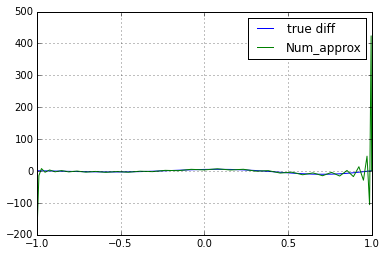

In [56]:
pt.plot(mesh, true_f_prime(mesh), label="true diff")
pt.plot(mesh, approx_sol, label = "Num_approx")
pt.grid()
pt.legend()

In [57]:
residual = true_f_prime(mesh) - approx_sol
error = la.norm(residual, np.inf)

In [58]:
error

422.87597458892077

In [59]:
residual

array([  1.76384263e-01,  -4.22875975e+02,   1.05948816e+02,
        -4.72595130e+01,   2.67193470e+01,  -1.72134000e+01,
         1.20509930e+01,  -8.93963334e+00,   6.92173941e+00,
        -5.53986828e+00,   4.55311317e+00,  -3.82482424e+00,
         3.27282183e+00,  -2.84529540e+00,   2.50828947e+00,
        -2.23882248e+00,   2.02091819e+00,  -1.84322348e+00,
         1.69752951e+00,  -1.57782815e+00,   1.47969748e+00,
        -1.39989718e+00,   1.33610374e+00,  -1.28674452e+00,
         1.25090840e+00,  -1.22832438e+00,   1.21941231e+00,
        -1.22542578e+00,   1.24873132e+00,  -1.29331266e+00,
         1.36567675e+00,  -1.47652780e+00,   1.64401382e+00,
        -1.90045262e+00,   2.30751778e+00,  -2.99461276e+00,
         4.27183931e+00,  -7.04456226e+00,   1.49822965e+01,
         1.60530915e+02])